In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

np.random.seed(42)

brands = ["Maruti", "Hyundai", "Honda", "Toyota", "BMW", "Audi", "Mercedes"]
models = ["Base", "Mid", "High"]

n = 1000

data = pd.DataFrame({
    "Brand": np.random.choice(brands, n),
    "Model": np.random.choice(models, n),
    "Year": np.random.randint(2005, 2023, n),
    "Engine_CC": np.random.randint(800, 3500, n),
    "Mileage": np.random.randint(8, 30, n),
    "Driven_KM": np.random.randint(1000, 200000, n)
})

base_price = {
    "Maruti": 300000,
    "Hyundai": 500000,
    "Honda": 700000,
    "Toyota": 900000,
    "BMW": 3000000,
    "Audi": 3500000,
    "Mercedes": 4000000
}

data["Price"] = (
    data["Brand"].map(base_price)
    + (2023 - data["Year"]) * -15000
    + data["Engine_CC"] * 80
    + data["Mileage"] * -500
    + (200000 - data["Driven_KM"]) * 0.08
    + np.random.randint(-50000, 50000, n)
)

data.head(50)

,Brand,Model,Year,Engine_CC,Mileage,Driven_KM,Price
0,Mercedes,High,2015,1647,10,152014,3969545.88
1,Toyota,Mid,2007,3234,19,21862,944937.04
2,BMW,High,2021,1058,26,12669,3068442.48
3,Mercedes,Base,2016,1082,26,122219,3973567.48
4,Honda,Base,2019,2449,20,185844,777559.48
5,BMW,Base,2020,2698,14,16916,3195458.72
6,BMW,Mid,2009,839,22,11878,2838320.76
7,Mercedes,Base,2010,3333,14,3985,4041939.20
8,Hyundai,Mid,2009,3067,15,42235,564767.20
9,Honda,Base,2007,1814,12,19931,579647.52


In [3]:
from sklearn.preprocessing import LabelEncoder

le_brand = LabelEncoder()
le_model = LabelEncoder()

data["Brand_Encoded"] = le_brand.fit_transform(data["Brand"])
data["Model_Encoded"] = le_model.fit_transform(data["Model"])

data_encoded = data[[
    "Brand_Encoded", "Model_Encoded", "Year", "Engine_CC",
    "Mileage", "Driven_KM", "Price"
]]

data_encoded.head()

,Brand_Encoded,Model_Encoded,Year,Engine_CC,Mileage,Driven_KM,Price
0,5,1,2015,1647,10,152014,3969545.88
1,6,2,2007,3234,19,21862,944937.04
2,1,1,2021,1058,26,12669,3068442.48
3,5,0,2016,1082,26,122219,3973567.48
4,2,0,2019,2449,20,185844,777559.48


In [4]:
X = data_encoded.drop("Price", axis=1)
y = data_encoded["Price"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [5]:
lr = LinearRegression()
lr.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [6]:
y_pred = lr.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

mae, mse, rmse, r2

(1155986.7284663701,
 1827960058629.2932,
 np.float64(1352020.7315826535),
 0.1420966917277977)

| Metric   | Value         | Interpretation                                                 |
| -------- | ------------- | -------------------------------------------------------------- |
| **MAE**  | 11.55 lakh    | Average error per prediction                                   |
| **MSE**  | 1.82 trillion | Squared error (used for optimization)                          |
| **RMSE** | 13.52 lakh    | More sensitive measure of large errors                         |
| **R²**   | 0.142         | Model explains only 14% of price variation → needs improvement |




## MAE = 1,155,986

Meaning:

On average, the model’s prediction is off by ₹11.55 lakh from the actual car price.

Interpretation:

If a car’s price is ₹10,00,000 (10 lakh), the model may predict anywhere around
₹8.8 lakh to ₹11.2 lakh approximately.

The error is in absolute rupees, so it is very easy to understand.

MAE is good when:

You want straightforward error interpretation

Outliers should not dominate the error


## MSE = 1,827,960,058,629 (1.82 trillion)

Meaning:

This is the average squared error.

Why squared?

Squaring:

Makes all errors positive

Penalizes large mistakes more heavily

Interpretation:

Not directly interpretable in rupees — it’s mainly used because it:

Makes gradient descent smoother

Helps in optimizing the model

Big MSE = Model making some very large mistakes



## RMSE = 1,352,020 (≈ ₹13.5 lakh)

Meaning:

This is the square root of MSE, making it interpretable in rupees again.

Interpretation:

The model is making an average error of ₹13.5 lakh.

Difference between MAE & RMSE:

MAE (~₹11.55 lakh) → average error

RMSE (~₹13.5 lakh) → slightly higher because large errors are penalized more

If RMSE >> MAE
👉 the model has big outliers or badly predicted expensive cars
👉 which is happening here

## R² = 0.142 (14.2%)

Meaning:

Only 14.2% of the variation in car prices is explained by the model.

Interpretation:

A good regression model normally has R² above 0.7

Your model is currently poor

This is expected because the dataset is synthetic and has:
✓ High randomness
✓ Noisy pricing
✓ Strong non-linear patterns

R² scale:
R² Value	Interpretation
0.90+	Excellent fit
0.70–0.90	Good fit
0.50–0.70	Moderate
0.20–0.50	Weak
<0.20	Very weak (your model here)

In [7]:
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": lr.coef_
})

coef_df

,Feature,Coefficient
0,Brand_Encoded,-231434.642647
1,Model_Encoded,78946.430946
2,Year,2674.413826
3,Engine_CC,96.671136
4,Mileage,-4838.155935
5,Driven_KM,0.003222


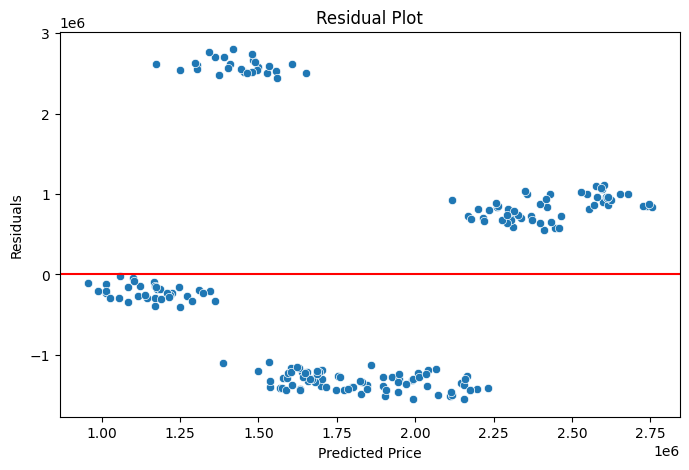

In [ ]:
residuals = y_test - y_pred

plt.figure(figsize=(8,5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color="red")
plt.title("Residual Plot")
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.show()

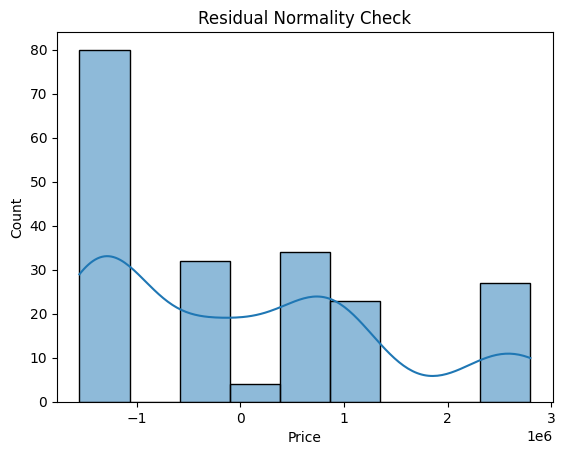

In [9]:
sns.histplot(residuals, kde=True)
plt.title("Residual Normality Check")
plt.show()

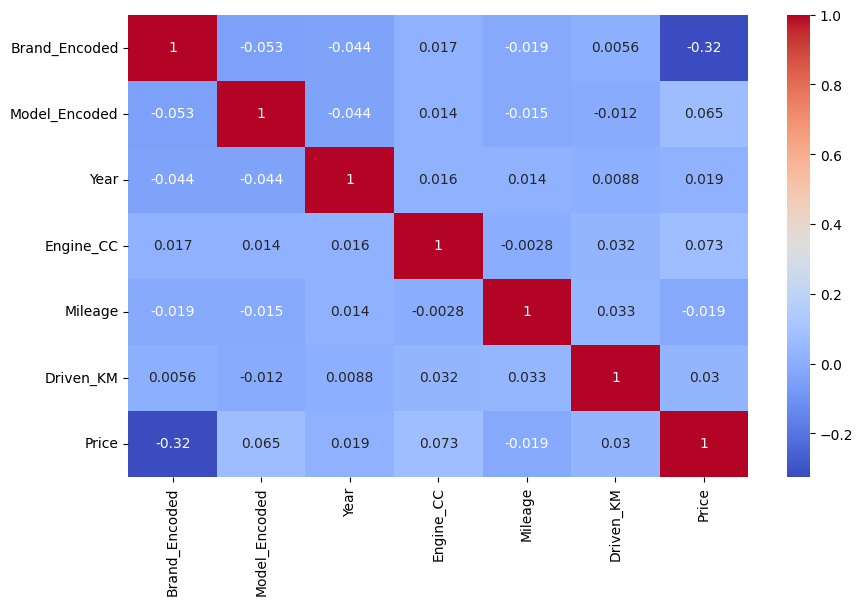

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(data_encoded.corr(), annot=True, cmap="coolwarm")
plt.show()